In [1]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
# Show each channel channel on screen
def view(image, name_of_window="window"):
    cv2.namedWindow(name_of_window, cv2.WINDOW_NORMAL)
    cv2.imshow(name_of_window, image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [7]:
view(img)

In [5]:
#USB CAMERA
#use 1 USB camera
#use 0 for laptop camera

video = cv2.VideoCapture(1)

while(video.isOpened()):
    check, frame = video.read()
    if frame is not None:
        img= cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow('frame', img)
        if cv2.waitKey(30) & 0xFF == ord("q"):
            break
    else:
            break
            
video.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### VIEW IMAGES

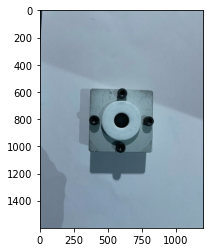

In [6]:
# Declare a variable with the path to your image
img = cv2.imread(cv2.samples.findFile("camera1.jpeg"))

#Show the image with matplotlib
plt.imshow(img)
plt.show()

In [11]:
img.shape

(1600, 1200, 3)

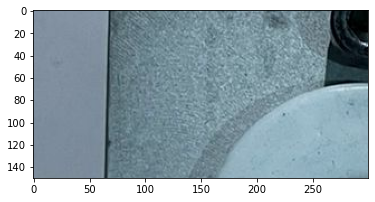

In [17]:
#cropping image
# Lets now crop a Region of Interest of an image, load and image and crop different parts of it

cropped = img[600:750, 300:600]
plt.imshow(cropped)

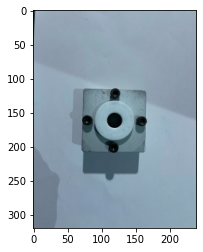

In [18]:
#resize 
scale_percent = 20 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
plt.imshow(resized)

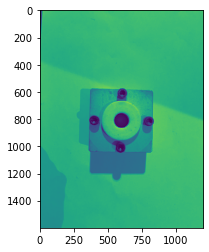

In [22]:
im= img.copy()
gray_image = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image)


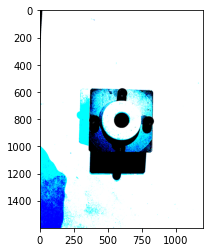

In [25]:
#threshold
ret, threshold_image = cv2.threshold(im, 127, 255, 0)
plt.imshow(threshold_image)

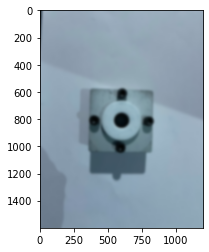

In [27]:
#Blurred
blurred = cv2.GaussianBlur(im, (51, 51), 0)
plt.imshow(blurred)

## Annotating images

### Rectangles

In [ ]:
# Draw green rectangle on top of a region of interest in your image
output = image.copy()
cv2.rectangle(output, (260, 800), (410, 240), (0, 255, 255), 10)
viewImage(output, " rectangle on his face") 

#line
cv2.line(output, (60, 20), (400, 200), (0, 0, 255), 5)
viewImage(output, "2 Doggos separated by a line")

### Adding text to images

In [ ]:
# Make a copy of your image and then write some text on top of the image
output = image.copy()
cv2.putText(output, "We <3 Dogs", (150, 360),cv2.FONT_HERSHEY_SIMPLEX, 15, (30, 105, 210), 40) 
viewImage(output, "image with text")

## Contours

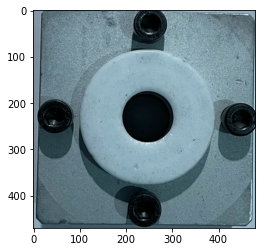

In [30]:
#1.crop
img = cv2.imread(cv2.samples.findFile("camera1.jpeg"))
cropped = img[580:1050, 350:830]

plt.imshow(cropped)

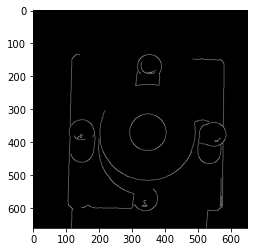

In [39]:
# 2.Convert the image above to grayscale

gray_im= cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)
# Apply some gaussian blur to it (try differente size kernels)

blur_im = cv2.GaussianBlur(gray_im,(9,9),0)


# 3.Apply Canny to find edges and display the image 

edges_im = cv2.Canny(blur_im,50,200)
plt.imshow(edges_im, cmap="gray")

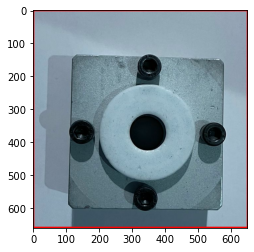

In [43]:
#contours2
#using blur

blur_im = cv2.GaussianBlur(gray_im,(9,9),0)

contours_im, h = cv2.findContours(blur_im, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
copy_im= cropped.copy()
cv2.drawContours(copy_im, contours_im, -1, (255, 0, 0), 5)
plt.imshow(copy_im)

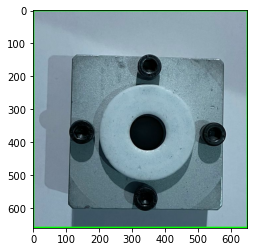

In [46]:
#just gray
contours_im, h= cv2.findContours(gray_im, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
copy_im= cropped.copy()
cv2.drawContours(copy_im, contours_im, -1, (0, 255, 0), 5)
plt.imshow(copy_im)

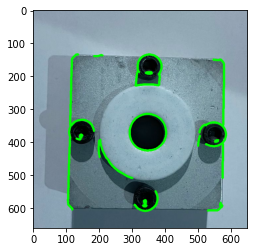

In [70]:

gray_im= cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)
# Apply some gaussian blur to it (try differente size kernels)
blur_im = cv2.GaussianBlur(cropped,(9,9),0)


# 3.Apply Canny to find edges and display the image 
edges_im = cv2.Canny(blur_im,120,200)


contours_im, h = cv2.findContours(edges_im, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
copy_im= cropped.copy()
cv2.drawContours(copy_im, contours_im, -1, (0, 255, 0), 6)
plt.imshow(copy_im)

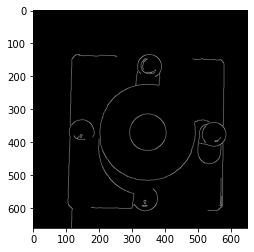

In [62]:
# Convert the image above to grayscale
gray= cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)
# Apply some gaussian blur to it (try differente size kernels)

blur = cv2.GaussianBlur(cropped,(9,9),0)


# Apply Canny to find edges and display the image 

edges = cv2.Canny(blur,50,200)
plt.imshow(edges, cmap="gray")

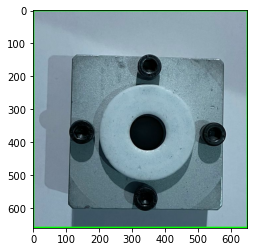

In [63]:
#threshold
blackg= cv2.bitwise_not(gray)
ret, th= cv2.threshold(gray, 248, 255, cv2.THRESH_BINARY_INV)

#contours
copy= cropped.copy()
contours, h = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

#imshow
cv2.drawContours(copy, contours, -1, (0, 255, 0), 5)
plt.imshow(copy)


## Contours

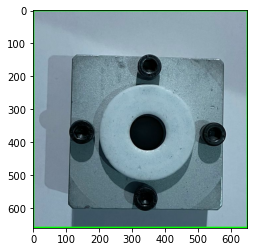

In [65]:
def get_contour_areas(contours):
    all_areas = []
    for contour in contours:
        contour_area = cv2.contourArea(contour)
        all_areas.append(contour_area)
    return all_areas

contour_area= get_contour_areas(contours)
sorted_contour= sorted(contours, key= cv2.contourArea, reverse= True)


copy_hand5= cropped.copy()

cv2.drawContours(copy_hand5, sorted_contour[:8], -1, (0, 255, 0), 5)
plt.imshow(copy_hand5)

In [ ]:
PLan is to find contours and sort it by area
crop the circles and squares

## Detection by color

In [37]:
img= cv2.imread(cv2.samples.findFile("camera1.jpeg"))
cropped = img[580:1050, 350:830]

blurred_frame = cv2.GaussianBlur(cropped, (3, 3), 0)
hsv = cv2.cvtColor(blurred_frame, cv2.COLOR_BGR2HSV)

lower_white = np.array([255,255,255])
upper_white = np.array([0,0,255])
mask = cv2.inRange(hsv, lower_white, upper_white)

# Segment only the detected region
segmented_img = cv2.bitwise_and(cropped, cropped, mask=mask)

# Find contours from the mask
contours, hierarchy = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output = cv2.drawContours(segmented_img, contours, -1, (0, 0, 255), 3)

# Showing the output
cv2.imshow("images", np.hstack([cropped, hsv]))
# show the images
cv2.waitKey(0)
cv2.destroyAllWindows()

#contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

In [ ]:
for c in contours:
        M = cv2.moments(c)
        if M["m00"] != 0:
            #####
            (x,y),radius = cv2.minEnclosingCircle(c)
            center = (int(x),int(y))
            
            radius = int(radius)
            cX = int(M["m10"] / M["m00"])
    
            cY = int(M["m01"] / M["m00"])
            #this condition is just to tell to detect in that area of the image only
            if cX > 500 and radius >8:
                cv2.circle(cropped, (cX, cY), 2, (0,255,0), -1)

In [ ]:
for contour in contours:
    cv2.drawContours(frame, contour, -1, (0, 255, 0), 3)
    view("Frame", frame)
    view("Mask", mask)

In [1]:
#finding hsv range of target object(pen)
import cv2
import numpy as np
import time
# A required callback method that goes into the trackbar function.
def nothing(x):
    pass

# Initializing the webcam feed.
cap = cv2.VideoCapture(0)
cap.set(3,1280)
cap.set(4,720)

# Create a window named trackbars.
cv2.namedWindow("Trackbars")

# Now create 6 trackbars that will control the lower and upper range of 
# H,S and V channels. The Arguments are like this: Name of trackbar, 
# window name, range,callback function. For Hue the range is 0-179 and
# for S,V its 0-255.
cv2.createTrackbar("L - H", "Trackbars", 0, 179, nothing)
cv2.createTrackbar("L - S", "Trackbars", 0, 255, nothing)
cv2.createTrackbar("L - V", "Trackbars", 0, 255, nothing)
cv2.createTrackbar("U - H", "Trackbars", 179, 179, nothing)
cv2.createTrackbar("U - S", "Trackbars", 255, 255, nothing)
cv2.createTrackbar("U - V", "Trackbars", 255, 255, nothing)
 
while True:
    
    # Start reading the webcam feed frame by frame.
    ret, frame = cap.read()
    if not ret:
        break
    # Flip the frame horizontally (Not required)
    frame = cv2.flip( frame, 1 ) 
    
    # Convert the BGR image to HSV image.
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    # Get the new values of the trackbar in real time as the user changes 
    # them
    l_h = cv2.getTrackbarPos("L - H", "Trackbars")
    l_s = cv2.getTrackbarPos("L - S", "Trackbars")
    l_v = cv2.getTrackbarPos("L - V", "Trackbars")
    u_h = cv2.getTrackbarPos("U - H", "Trackbars")
    u_s = cv2.getTrackbarPos("U - S", "Trackbars")
    u_v = cv2.getTrackbarPos("U - V", "Trackbars")
 
    # Set the lower and upper HSV range according to the value selected
    # by the trackbar
    lower_range = np.array([l_h, l_s, l_v])
    upper_range = np.array([u_h, u_s, u_v])
    
    # Filter the image and get the binary mask, where white represents 
    # your target color
    mask = cv2.inRange(hsv, lower_range, upper_range)
 
    # You can also visualize the real part of the target color (Optional)
    res = cv2.bitwise_and(frame, frame, mask=mask)
    
    # Converting the binary mask to 3 channel image, this is just so 
    # we can stack it with the others
    mask_3 = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
    
    # stack the mask, orginal frame and the filtered result
    stacked = np.hstack((mask_3,frame,res))
    
    # Show this stacked frame at 40% of the size.
    cv2.imshow('Trackbars',cv2.resize(stacked,None,fx=0.4,fy=0.4))
    
    # If the user presses ESC then exit the program
    key = cv2.waitKey(1)
    if key == 27:
        break
    
    # If the user presses `s` then print this array.
    if key == ord('s'):
        
        thearray = [[l_h,l_s,l_v],[u_h, u_s, u_v]]
        print(thearray)
        
        # Also save this array as penval.npy
        np.save('hsv_value',thearray)
        break
    
# Release the camera & destroy the windows.    
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

## Cut out cirle  297 441

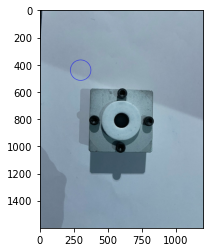

In [41]:
img= cv2.imread(cv2.samples.findFile("camera1.jpeg"))
# given x,y are circle center and r is radius
x= 297 
y= 441
center_coordinates= (x,y)
radius= 75

image = cv2.circle(img, center_coordinates, radius, (0,0,255), 2)
plt.imshow(image)

## crop circles 

In [3]:
# import the necessary packages
import numpy as np
import argparse
import cv2
img= []
image= cv2.imread(cv2.samples.findFile("camera3.jpeg"))
# Read image.
img = image
  
# Convert to grayscale.
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Blur using 3 * 3 kernel.
gray_blurred = cv2.blur(gray, (3, 3))
  
# Apply Hough transform on the blurred image.
detected_circles = cv2.HoughCircles(gray_blurred, 
                   cv2.HOUGH_GRADIENT, 1, 20, param1 = 50,
               param2 = 30, minRadius = 36, maxRadius = 40)
  
# Draw circles that are detected.
if detected_circles is not None:
  
    # Convert the circle parameters a, b and r to integers.
    detected_circles = np.uint16(np.around(detected_circles))
  
    for pt in detected_circles[0, :]:
        a, b, r = pt[0], pt[1], pt[2]
  
        # Draw the circumference of the circle.
        cv2.circle(img, (a, b), r, (0, 255, 0), 2)
  
        # Draw a small circle (of radius 1) to show the center.
        cv2.circle(img, (a, b), 1, (0, 0, 255), 3)
        #cv2.namedWindow("Detected Circle", cv2.WINDOW_NORMAL)
        cv2.imshow("Detected Circle", image)
        
        if cv2.waitKey(30) & 0xFF == ord("q"):
            cv2.destroyAllWindows()
            cv2.waitKey(0)

        

In [2]:
# import the necessary packages
import numpy as np
import argparse
import cv2
img= []
image= cv2.imread(cv2.samples.findFile("camera3.jpeg"))
# Read image.
img = image
  
# Convert to grayscale.
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Blur using 3 * 3 kernel.
gray_blurred = cv2.blur(gray, (3, 3))
  
# Apply Hough transform on the blurred image.
detected_circles = cv2.HoughCircles(gray_blurred, 
                   cv2.HOUGH_GRADIENT, 1, 20, param1 = 50,
               param2 = 30, minRadius = 36, maxRadius = 40)
print(detected_circles)  
# Draw circles that are detected.
if detected_circles is not None:
  
    # Convert the circle parameters a, b and r to integers.
    detected_circles = np.uint16(np.around(detected_circles))
  
    for pt in detected_circles[0, 5]:
        a, b, r = pt[0], pt[1], pt[2]
  
        # Draw the circumference of the circle.
        cv2.circle(img, (a, b), r, (0, 255, 0), 2)
        print(r)

[[[ 560.5  677.5   37.1]
  [ 569.5 1056.5   39.4]
  [ 372.5  870.5   37.2]
  [ 572.5  858.5   39.4]]]


IndexError: index 5 is out of bounds for axis 1 with size 4